<a href="https://colab.research.google.com/github/adityapatil4141/YouTube-channel-analytics/blob/main/YouTube_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
# Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
# Mounting google drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
# Import dataset in notebook:

df = pd.read_csv("/content/drive/MyDrive/work files /YouTube analytics/Table data.csv")

In [230]:
# Dataset view:

df.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (INR),Average view duration,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,28630541.0,1.175456e+06,125166.0,696531.733,0:02:27,297319169.0,8.29
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","Jul 1, 2022",1013185.0,2.592474e+04,4854.0,15544.911,0:01:32,9658308.0,9.83
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Aug 2, 2022",683897.0,2.188941e+04,2772.0,16310.607,0:01:55,8542671.0,7.30
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,"Jan 28, 2023",639396.0,3.056139e+04,7375.0,18639.696,0:02:52,10399785.0,5.38
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,"Apr 27, 2022",523070.0,1.558760e+04,3147.0,14869.025,0:01:47,7479874.0,6.40


In [231]:
# Null values from the dataset:

df.isnull().sum()

Content                               0
Video title                           2
Video publish time                    2
Views                                 1
Watch time (hours)                    1
Subscribers                           1
Estimated revenue (INR)               2
Average view duration                 1
Impressions                           1
Impressions click-through rate (%)    1
dtype: int64

In [232]:
# Duplicated values in the dataset:

df.duplicated().sum()

0

In [233]:
# Installinf googletrans in notebook:

!pip install googletrans==4.0.0-rc1

 As our dataset has text in marathi language we will convert in into english text, because english text will make it easier to do analysis and video title column is an important column in our dataset:

In [234]:
# Creating a function which will convert marathi text in english text:

from googletrans import Translator
def marathi_to_english(text):
  translator = Translator()
  translated_text = translator.translate(text,src='mr',dest='en')
  return translated_text.text



In [235]:
# Applying function on the column:

df['English title'] = df['Video title'].apply(marathi_to_english)

In [236]:
# Dataset new view:

df.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (INR),Average view duration,Impressions,Impressions click-through rate (%),English title
0,Total,NaN,NaN,28630541.0,1.175456e+06,125166.0,696531.733,0:02:27,297319169.0,8.29,Nan
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","Jul 1, 2022",1013185.0,2.592474e+04,4854.0,15544.911,0:01:32,9658308.0,9.83,"In Pune, this place will be available, Khapatt..."
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Aug 2, 2022",683897.0,2.188941e+04,2772.0,16310.607,0:01:55,8542671.0,7.30,"Ganapati Decorating Market, the largest wholes..."
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,"Jan 28, 2023",639396.0,3.056139e+04,7375.0,18639.696,0:02:52,10399785.0,5.38,Different types of commercial machines can be ...
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,"Apr 27, 2022",523070.0,1.558760e+04,3147.0,14869.025,0:01:47,7479874.0,6.40,Holiday Jewelry Shop Pune |Chepest jewellery m...


In [237]:
# Dataset shape:

df.shape

(502, 11)

In [238]:
# Dataset new view:

df.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (INR),Average view duration,Impressions,Impressions click-through rate (%),English title
0,Total,NaN,NaN,28630541.0,1.175456e+06,125166.0,696531.733,0:02:27,297319169.0,8.29,Nan
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","Jul 1, 2022",1013185.0,2.592474e+04,4854.0,15544.911,0:01:32,9658308.0,9.83,"In Pune, this place will be available, Khapatt..."
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Aug 2, 2022",683897.0,2.188941e+04,2772.0,16310.607,0:01:55,8542671.0,7.30,"Ganapati Decorating Market, the largest wholes..."
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,"Jan 28, 2023",639396.0,3.056139e+04,7375.0,18639.696,0:02:52,10399785.0,5.38,Different types of commercial machines can be ...
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,"Apr 27, 2022",523070.0,1.558760e+04,3147.0,14869.025,0:01:47,7479874.0,6.40,Holiday Jewelry Shop Pune |Chepest jewellery m...


In [239]:
# Dataset information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             502 non-null    object 
 1   Video title                         500 non-null    object 
 2   Video publish time                  500 non-null    object 
 3   Views                               501 non-null    float64
 4   Watch time (hours)                  501 non-null    float64
 5   Subscribers                         501 non-null    float64
 6   Estimated revenue (INR)             500 non-null    float64
 7   Average view duration               501 non-null    object 
 8   Impressions                         501 non-null    float64
 9   Impressions click-through rate (%)  501 non-null    float64
 10  English title                       502 non-null    object 
dtypes: float64(6), object(5)
memory usage: 43.3+ 

In [240]:
# Dropping null values from the dataset:

df.dropna(inplace=True)

In [241]:
# Convering watch time column values in appropriate and readable format:

df['Watch time (hours)'] = df['Watch time (hours)'].apply(lambda x: '{:.0f}'.format(x))

In [242]:
# Converting watch time column in numeric datatype:

df['Watch time (hours)'] = pd.to_numeric(df['Watch time (hours)'])

In [243]:
# Dataset new view:

df.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (INR),Average view duration,Impressions,Impressions click-through rate (%),English title
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","Jul 1, 2022",1013185.0,25925,4854.0,15544.911,0:01:32,9658308.0,9.83,"In Pune, this place will be available, Khapatt..."
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Aug 2, 2022",683897.0,21889,2772.0,16310.607,0:01:55,8542671.0,7.30,"Ganapati Decorating Market, the largest wholes..."
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,"Jan 28, 2023",639396.0,30561,7375.0,18639.696,0:02:52,10399785.0,5.38,Different types of commercial machines can be ...
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,"Apr 27, 2022",523070.0,15588,3147.0,14869.025,0:01:47,7479874.0,6.40,Holiday Jewelry Shop Pune |Chepest jewellery m...
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,"Apr 12, 2023",520340.0,27874,3676.0,12058.536,0:03:12,5665672.0,8.28,Dryfruit and spices famous and true wholesale ...


In [244]:
# Renaming columns:

df.rename(columns={'Video publish time':'Publish date'},inplace=True)

In [245]:
# Coverting Publish date in datetime format:

df['Publish date'] = pd.to_datetime(df['Publish date'])

In [246]:
# Rearranging column in the dataframe for easy understanding:

df = df[['Content','Video title','English title','Publish date','Views','Watch time (hours)','Average view duration','Estimated revenue (INR)','Subscribers','Impressions','Impressions click-through rate (%)']]

In [247]:
# dataset updated view

df.head()

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%)
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","In Pune, this place will be available, Khapatt...",2022-07-01,1013185.0,25925,0:01:32,15544.911,4854.0,9658308.0,9.83
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Ganapati Decorating Market, the largest wholes...",2022-08-02,683897.0,21889,0:01:55,16310.607,2772.0,8542671.0,7.30
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,Different types of commercial machines can be ...,2023-01-28,639396.0,30561,0:02:52,18639.696,7375.0,10399785.0,5.38
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,Holiday Jewelry Shop Pune |Chepest jewellery m...,2022-04-27,523070.0,15588,0:01:47,14869.025,3147.0,7479874.0,6.40
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,Dryfruit and spices famous and true wholesale ...,2023-04-12,520340.0,27874,0:03:12,12058.536,3676.0,5665672.0,8.28


In [248]:
# Adding new column in dataframe for visualization:

df['Publish_year'] = df['Publish date'].dt.year
df['Publish_month'] = df['Publish date'].dt.month
df['Publish_day'] = df['Publish date'].dt.day

<ipython-input-248-d959636058fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publish_year'] = df['Publish date'].dt.year
<ipython-input-248-d959636058fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publish_month'] = df['Publish date'].dt.month
<ipython-input-248-d959636058fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [249]:
# Dataset new view:

df.head()

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%),Publish_year,Publish_month,Publish_day
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","In Pune, this place will be available, Khapatt...",2022-07-01,1013185.0,25925,0:01:32,15544.911,4854.0,9658308.0,9.83,2022,7,1
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Ganapati Decorating Market, the largest wholes...",2022-08-02,683897.0,21889,0:01:55,16310.607,2772.0,8542671.0,7.30,2022,8,2
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,Different types of commercial machines can be ...,2023-01-28,639396.0,30561,0:02:52,18639.696,7375.0,10399785.0,5.38,2023,1,28
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,Holiday Jewelry Shop Pune |Chepest jewellery m...,2022-04-27,523070.0,15588,0:01:47,14869.025,3147.0,7479874.0,6.40,2022,4,27
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,Dryfruit and spices famous and true wholesale ...,2023-04-12,520340.0,27874,0:03:12,12058.536,3676.0,5665672.0,8.28,2023,4,12


In [250]:
# grouping by publish year with sum of views:

view_year = df.groupby('Publish_year')['Views'].sum()

Text(0, 0.5, 'Views')

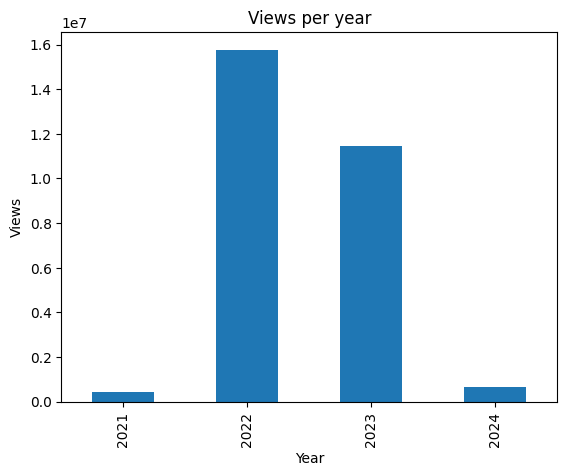

In [251]:
# Plotting bar plot :

view_year.plot(kind='bar')
plt.title('Views per year')
plt.xlabel('Year')
plt.ylabel('Views')

We can see that year 2022 has the highest number of views followed by year 2023:
after year 2021, channel views grown exponentially reason may be some videos may have gone viral.

In [252]:
df.head()

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%),Publish_year,Publish_month,Publish_day
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","In Pune, this place will be available, Khapatt...",2022-07-01,1013185.0,25925,0:01:32,15544.911,4854.0,9658308.0,9.83,2022,7,1
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Ganapati Decorating Market, the largest wholes...",2022-08-02,683897.0,21889,0:01:55,16310.607,2772.0,8542671.0,7.30,2022,8,2
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,Different types of commercial machines can be ...,2023-01-28,639396.0,30561,0:02:52,18639.696,7375.0,10399785.0,5.38,2023,1,28
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,Holiday Jewelry Shop Pune |Chepest jewellery m...,2022-04-27,523070.0,15588,0:01:47,14869.025,3147.0,7479874.0,6.40,2022,4,27
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,Dryfruit and spices famous and true wholesale ...,2023-04-12,520340.0,27874,0:03:12,12058.536,3676.0,5665672.0,8.28,2023,4,12


In [253]:
df['CTR'] = df['Views']/df['Impressions'] *100

In [254]:
df['CTR'].max()

185.56217071131394

Text(0.5, 1.0, 'Click-Through Rate vs Impressions')

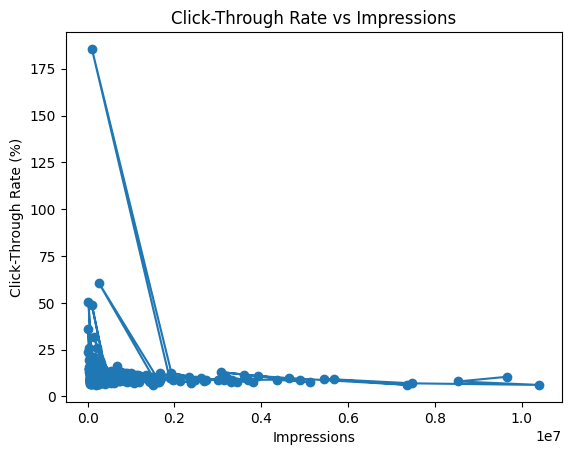

In [255]:
plt.plot(df['Impressions'],df['CTR'],marker='o',linestyle='-')
plt.xlabel('Impressions')
plt.ylabel('Click-Through Rate (%)')
plt.title('Click-Through Rate vs Impressions')


In [256]:
df.iloc[30]

Content                                                                     Bxe8q9EzxIE
Video title                           🔴 Best Ladies Shopee Hadapsar Pune / महिलांसाठ...
English title                         L Best Ladies Shopee Hadapsar Pune / All Purch...
Publish date                                                        2023-07-22 00:00:00
Views                                                                          184202.0
Watch time (hours)                                                                 3606
Average view duration                                                           0:01:10
Estimated revenue (INR)                                                        3842.371
Subscribers                                                                       950.0
Impressions                                                                     99267.0
Impressions click-through rate (%)                                                 8.39
Publish_year                    

In [258]:
import re
def remove_emojis(text):
    # Remove emojis using a regular expression
    return re.sub(r'[\U00010000-\U0010ffff]', '', text)

In [259]:
df['Video title'] = df['Video title'].apply(remove_emojis)


In [265]:
max_ctr_video = df[df['CTR']==df['CTR'].max()]

In [266]:
max_ctr_video

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%),Publish_year,Publish_month,Publish_day,CTR
31,Bxe8q9EzxIE,Best Ladies Shopee Hadapsar Pune / महिलांसाठी...,L Best Ladies Shopee Hadapsar Pune / All Purch...,2023-07-22,184202.0,3606,0:01:10,3842.371,950.0,99267.0,8.39,2023,7,22,185.562171


In [261]:
# Top 5 video with highest ctr
top_ctr = df.nlargest(5,'CTR')
top_ctr_title = top_ctr['Content']
top_ctr = top_ctr['CTR']

In [262]:
top_ctr

31     185.562171
38      60.594417
377     50.653610
145     48.668487
483     35.903597
Name: CTR, dtype: float64

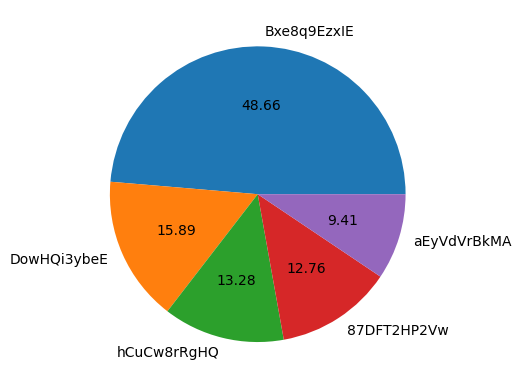

In [269]:
plt.pie(top_ctr,autopct='%.2f',labels=top_ctr_title)
plt.show()

In [270]:
titles = df[df['Content'].isin(top_ctr_title)][['Content', 'Video title','CTR']]
titles

# Below are the video title which has the highest CTR, reason must be thumbnail quality as content.

,Content,Video title,CTR
31,Bxe8q9EzxIE,Best Ladies Shopee Hadapsar Pune / महिलांसाठी...,185.562171
38,DowHQi3ybeE,"हडपसर मधील लेडीज शूज,बॅग्स,ज्वेलरी चे खूप मोठे...",60.594417
145,87DFT2HP2Vw,"ज्वेलरी,फुटवेअर,कॉसमेटिक्स,पर्स इ. चे हडपसर मध...",48.668487
377,hCuCw8rRgHQ,Tulsibaug market pune || tulsibaug street shop...,50.653610
483,aEyVdVrBkMA,MG Road Pune || best place for street shopping...,35.903597


Videos with above content id have the highest CTR(click through rate)

In [271]:
df.head()

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%),Publish_year,Publish_month,Publish_day,CTR
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","In Pune, this place will be available, Khapatt...",2022-07-01,1013185.0,25925,0:01:32,15544.911,4854.0,9658308.0,9.83,2022,7,1,10.490295
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Ganapati Decorating Market, the largest wholes...",2022-08-02,683897.0,21889,0:01:55,16310.607,2772.0,8542671.0,7.30,2022,8,2,8.005658
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,Different types of commercial machines can be ...,2023-01-28,639396.0,30561,0:02:52,18639.696,7375.0,10399785.0,5.38,2023,1,28,6.148166
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,Holiday Jewelry Shop Pune |Chepest jewellery m...,2022-04-27,523070.0,15588,0:01:47,14869.025,3147.0,7479874.0,6.40,2022,4,27,6.993032
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,Dryfruit and spices famous and true wholesale ...,2023-04-12,520340.0,27874,0:03:12,12058.536,3676.0,5665672.0,8.28,2023,4,12,9.184083


In [272]:
month_views = df.groupby('Publish_month')['Views'].sum()
month_views

Publish_month
1     2869036.0
2     1650165.0
3     1694697.0
4     4105786.0
5     2823414.0
6     1417157.0
7     3682403.0
8     3126066.0
9      928728.0
10    1450447.0
11    2894651.0
12    1627853.0
Name: Views, dtype: float64

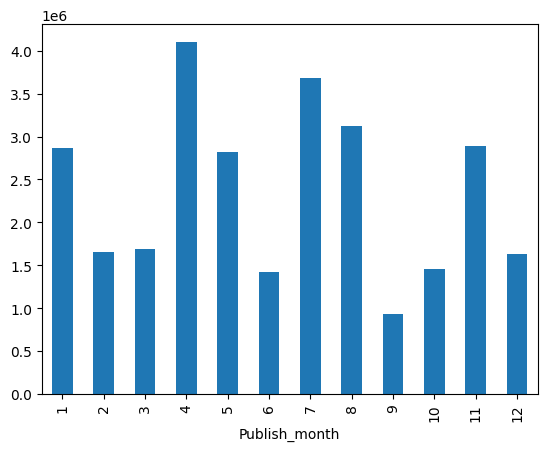

In [273]:
month_views.plot(kind='bar')
plt.show()

In [275]:
year_month_views = df.groupby(['Publish_year','Publish_month'])['Views'].sum()
year_month_views

Publish_year  Publish_month
2021          2                   6583.0
              5                   6484.0
              9                  12496.0
              10                 30704.0
              11                294896.0
              12                 64660.0
2022          1                 440083.0
              2                 690692.0
              3                 618382.0
              4                2475196.0
              5                1936335.0
              6                1063222.0
              7                2541682.0
              8                2191460.0
              9                 622885.0
              10                620580.0
              11               1674713.0
              12                896487.0
2023          1                1882673.0
              2                 846248.0
              3                1076315.0
              4                1630590.0
              5                 880595.0
              6              

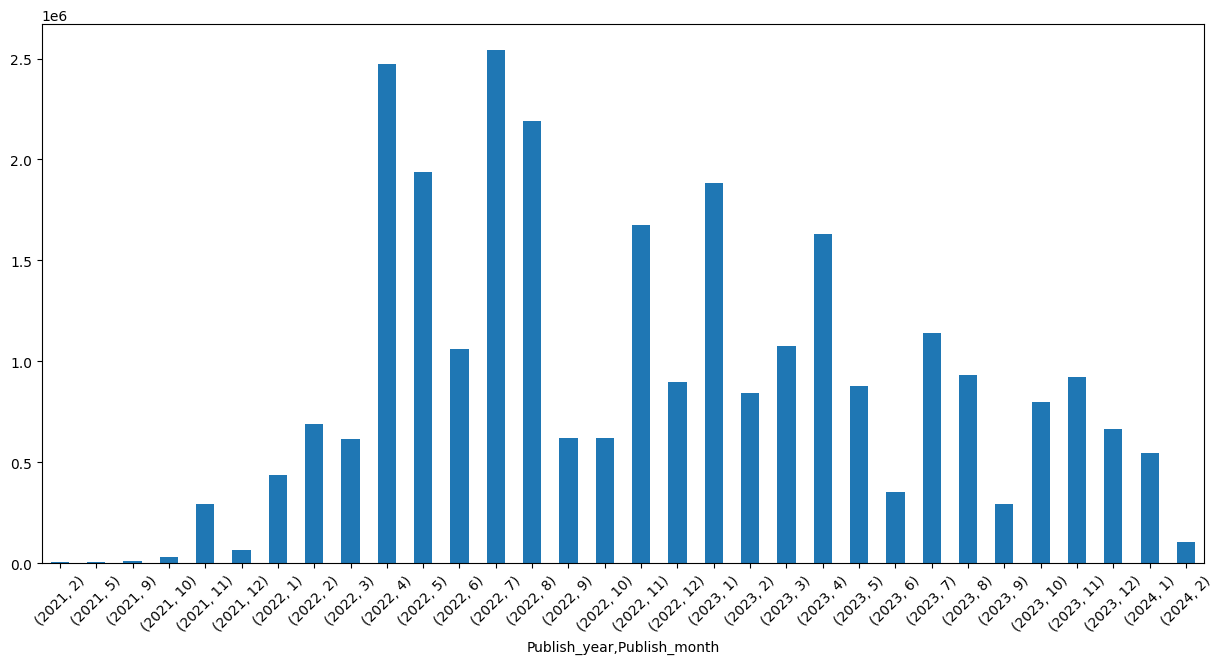

In [279]:
plt.figure(figsize=(15,7))
year_month_views.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# From above observations we can conclude that any years 4th ,7th and 8th month make a signficant impact on channels views.

In [280]:
year_month_subs = df.groupby(['Publish_year','Publish_month'])['Subscribers'].sum()
year_month_subs

Publish_year  Publish_month
2021          2                   30.0
              5                   79.0
              9                   51.0
              10                 104.0
              11                1097.0
              12                 231.0
2022          1                 2812.0
              2                 2984.0
              3                 3603.0
              4                14521.0
              5                11357.0
              6                 3968.0
              7                10861.0
              8                 9110.0
              9                 2292.0
              10                1805.0
              11                5972.0
              12                3014.0
2023          1                14371.0
              2                 3290.0
              3                 3951.0
              4                 8181.0
              5                 3138.0
              6                  729.0
              7                 3198

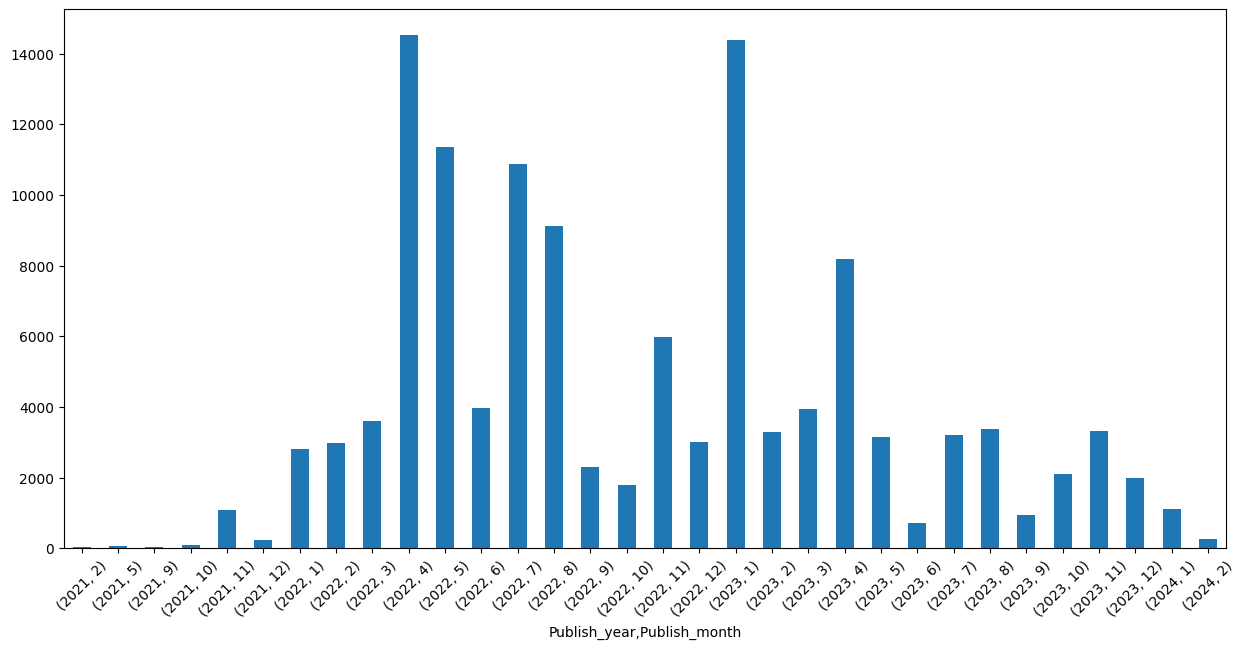

In [281]:
plt.figure(figsize=(15,7))
year_month_subs.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# From above observation we can conclude that any years 1st,4th,7th & 8th month gains highest suscribers.
# We can conclude that majority people suscribe after watching videos.

In [282]:
df.head()

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%),Publish_year,Publish_month,Publish_day,CTR
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","In Pune, this place will be available, Khapatt...",2022-07-01,1013185.0,25925,0:01:32,15544.911,4854.0,9658308.0,9.83,2022,7,1,10.490295
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Ganapati Decorating Market, the largest wholes...",2022-08-02,683897.0,21889,0:01:55,16310.607,2772.0,8542671.0,7.30,2022,8,2,8.005658
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,Different types of commercial machines can be ...,2023-01-28,639396.0,30561,0:02:52,18639.696,7375.0,10399785.0,5.38,2023,1,28,6.148166
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,Holiday Jewelry Shop Pune |Chepest jewellery m...,2022-04-27,523070.0,15588,0:01:47,14869.025,3147.0,7479874.0,6.40,2022,4,27,6.993032
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,Dryfruit and spices famous and true wholesale ...,2023-04-12,520340.0,27874,0:03:12,12058.536,3676.0,5665672.0,8.28,2023,4,12,9.184083
